In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


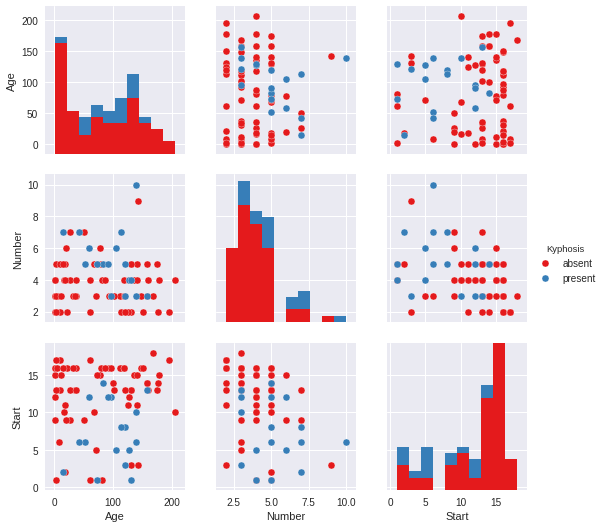

In [6]:
sns.pairplot (df, hue='Kyphosis',palette='Set1')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop ('Kyphosis',axis=1)
y=df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit (X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.68      0.76      0.72        17
    present       0.33      0.25      0.29         8

avg / total       0.57      0.60      0.58        25



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.74      1.00      0.85        17
    present       1.00      0.25      0.40         8

avg / total       0.82      0.76      0.71        25

